In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import random
import math
plt.rc('text', usetex = True)

# Problem 6.1

In [3]:
m1 = [0, 8]
m2 = [2, 4]                                              
cov1 = [[4, 0], [0, 4]]                                      
cov2 = [[3, 1], [1, 3]]
error_m = [0, 0]
error_cov = [[0.25 ** 2, 0], [0, 0.25 ** 2]]
k1 = np.random.multivariate_normal(m1, cov1, 50)
k2 = np.random.multivariate_normal(m2, cov2, 50)
k1 = k1 + np.random.multivariate_normal(error_m, error_cov, 50)
k2 = k2 + np.random.multivariate_normal(error_m, error_cov, 50)
d = np.concatenate((k1, k2), axis = 0)

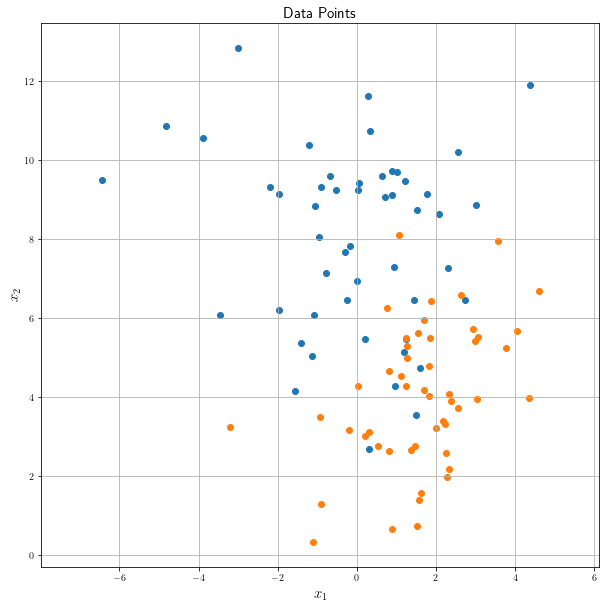

In [4]:
plt.figure(figsize = (10,10))                                 
plt.scatter(k1[:, 0], k1[:, 1])    
plt.scatter(k2[:, 0], k2[:, 1])                               
plt.xlabel('$x_1$', fontsize = 15)              
plt.ylabel('$x_2$', fontsize = 15)    
plt.axis('equal')                     
plt.title('Data Points', fontsize = 15)    
plt.grid()            
plt.show()

# Problem 6.2

In [5]:
class KMeans():
    def __init__(self, data):
        self.data = data
        self.miu1 = random.choice(self.data)
        self.miu2 = random.choice(self.data)
        self.labels = np.zeros(self.data.shape[0])
        self.cost = self.E()

    def E(self):
        this_cost = 0 
        for i in range(self.data.shape[0]):
            d1, d2 = np.linalg.norm(self.data[i,:] - self.miu1, 2), np.linalg.norm(self.data[i,:] - self.miu2, 2)
            if (d1 < d2):
                this_cost += d1
                self.labels[i] = 1
            else:
                this_cost += d2 
                self.labels[i] = 2
        return this_cost

    def M(self):
        this_cost = 0
        data_1 = (self.labels == 1)
        data_2 = (self.labels == 2)
        self.miu1 = self.data[data_1].mean(axis = 0)
        self.miu2 = self.data[data_2].mean(axis = 0)

    def EM(self):
        last_step_cost = self.cost
        this_step_cost = -math.inf
        self.M()
        while(abs(this_step_cost - last_step_cost) > 1e-10):
            last_step_cost = this_step_cost
            this_step_cost = self.E()
            self.cost = this_step_cost
            self.M()

In [6]:
kmeans_object = KMeans(d)
kmeans_object.EM()
data_k1_tilde = kmeans_object.data[kmeans_object.labels == 1]
data_k2_tilde = kmeans_object.data[kmeans_object.labels == 2]

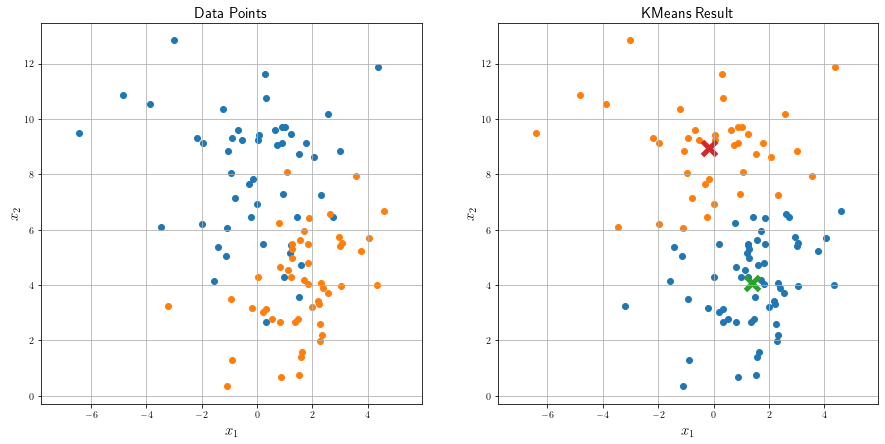

In [7]:
plt.figure(figsize = (15, 7))  
plt.subplot(1, 2, 1)                             
plt.scatter(k1[:, 0], k1[:, 1])    
plt.scatter(k2[:, 0], k2[:, 1])                               
plt.xlabel('$x_1$', fontsize = 15)              
plt.ylabel('$x_2$', fontsize = 15)    
plt.axis('equal')                     
plt.title('Data Points', fontsize = 15)    
plt.grid()            

plt.subplot(1, 2, 2)
plt.scatter(data_k1_tilde[:, 0], data_k1_tilde[:, 1])    
plt.scatter(data_k2_tilde[:, 0], data_k2_tilde[:, 1]) 
plt.scatter(kmeans_object.miu1[0], kmeans_object.miu1[1], marker = 'x', s = 200, linewidth = 5)
plt.scatter(kmeans_object.miu2[0], kmeans_object.miu2[1], marker = 'x', s = 200, linewidth = 5)
plt.xlabel('$x_1$', fontsize = 15)              
plt.ylabel('$x_2$', fontsize = 15)    
plt.axis('equal')                     
plt.title('KMeans Result', fontsize = 15)    
plt.grid()            
plt.show()

# Problem 6.3

In [10]:
# Initial state
m1 = random.choice(d)
m2 = random.choice(d)
cov1 = np.cov(np.transpose(d))
cov2 = np.cov(np.transpose(d))
pi = 0.5

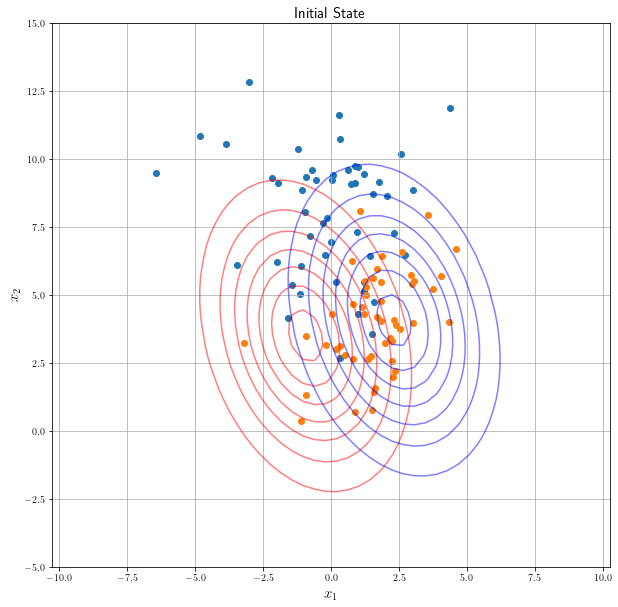

In [11]:
x1 = np.linspace(-10, 10, 50)  
x2 = np.linspace(-5, 15, 50)
X, Y = np.meshgrid(x1,x2) 

Z1 = multivariate_normal(m1, cov1)  
Z2 = multivariate_normal(m2, cov2)

pos = np.empty(X.shape + (2,))                
pos[:, :, 0] = X; pos[:, :, 1] = Y   

plt.figure(figsize=(10,10))                                                          
plt.scatter(k1[:, 0], k1[:, 1])    
plt.scatter(k2[:, 0], k2[:, 1])                               
plt.contour(X, Y, Z1.pdf(pos), colors = "r", alpha = 0.5) 
plt.contour(X, Y, Z2.pdf(pos), colors = "b", alpha = 0.5) 
plt.xlabel('$x_1$', fontsize = 15)              
plt.ylabel('$x_2$', fontsize = 15)                     
plt.title('Initial State', fontsize = 15)    
plt.axis('equal')                                                                  
plt.grid()                                                                         
plt.show()

In [24]:
'''
The EM code reference is from https://medium.com/@prateek.shubham.94/expectation-maximization-algorithm-7a4d1b65ca55
'''
def Estep(lis1):
    m1=lis1[0]
    m2=lis1[1]
    cov1=lis1[2]
    cov2=lis1[3]
    pi=lis1[4]
    
    pt2 = multivariate_normal.pdf(d, mean=m2, cov=cov2)
    pt1 = multivariate_normal.pdf(d, mean=m1, cov=cov1)
    w1 = pi * pt2
    w2 = (1-pi) * pt1
    eval1 = w1/(w1+w2)

    return(eval1)

In [25]:
def Mstep(eval1):
    num_mu1,din_mu1,num_mu2,din_mu2=0,0,0,0

    for i in range(0,len(d)):
        num_mu1 += (1-eval1[i]) * d[i]
        din_mu1 += (1-eval1[i])

        num_mu2 += eval1[i] * d[i]
        din_mu2 += eval1[i]

    mu1 = num_mu1/din_mu1
    mu2 = num_mu2/din_mu2

    num_s1,din_s1,num_s2,din_s2=0,0,0,0
    for i in range(0,len(d)):

        q1 = np.matrix(d[i]-mu1)
        num_s1 += (1-eval1[i]) * np.dot(q1.T, q1)
        din_s1 += (1-eval1[i])

        q2 = np.matrix(d[i]-mu2)
        num_s2 += eval1[i] * np.dot(q2.T, q2)
        din_s2 += eval1[i]

    s1 = num_s1/din_s1
    s2 = num_s2/din_s2

    pi = sum(eval1)/len(d)
    
    lis2=[mu1, mu2, s1, s2, pi]
    return(lis2)

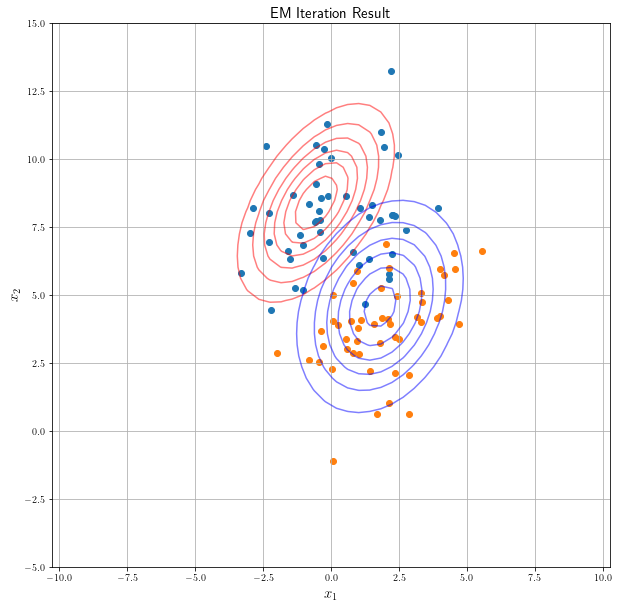

In [27]:
iterations = 20
lis1=[m1,m2,cov1,cov2,pi]
for i in range(0, iterations):
    lis2 = Mstep(Estep(lis1))
    lis1=lis2
    if(i == 19):
        mu1=lis1[0]
        mu2=lis1[1]
        s1=lis1[2]
        s2=lis1[3]
        Z1 = multivariate_normal(mu1, s1)  
        Z2 = multivariate_normal(mu2, s2)

        pos = np.empty(X.shape + (2,))                
        pos[:, :, 0] = X; pos[:, :, 1] = Y   

        plt.figure(figsize=(10, 10))                                                          
        plt.scatter(k1[:, 0], k1[:, 1])    
        plt.scatter(k2[:, 0], k2[:, 1])                               
        plt.contour(X, Y, Z1.pdf(pos), colors = "r" ,alpha = 0.5) 
        plt.contour(X, Y, Z2.pdf(pos), colors = "b" ,alpha = 0.5) 
        plt.xlabel('$x_1$', fontsize = 15)              
        plt.ylabel('$x_2$', fontsize = 15)                     
        plt.title('EM Iteration Result', fontsize = 15)    
        plt.axis('equal')                                                               
        plt.grid()                                                                         
        plt.show()